Assignment 4: Decision Tree and Naïve Bayesian Cross-validation

Tyler Gardner

September 16th 2021




# Task 1

In the below code chunk the packages that are needed for the assignment are imported and the I mount my google drive so we can read in the dataset. The data is then imported using the pd.read_csv() function. After we have the data successfully imported in, the code then proceeds to clean the data for how we want to test and evaluate it. The first step to this is removing all the numeric features so it is a more fair comparison of the tree to the naive bayes model which will only be supporting categorical features. After we get all numeric features removed, we then pop the target variable into a new variable and encode the target variable as well. We then look at the shape and other information to get the overall structure and summary of the data frame using the info(), describe() and head() commands for example. We then use the pd.get_dummies() to encode the dataframe. We then partition the data frame for simple hold-out evaluation, 70% for training and 30% for testing. The code following the partition shows the distributions in percentages of the target variable in the whole input data frame, the train set and the test set. 

## Code Chunk 1 - Set Up, Data Import, and Preparation

In [ ]:
# Import packages needed
import pandas as pd
import numpy as np
import sklearn

import os

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB


import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import metrics
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate



In [ ]:
# mount the google drive location so we can read the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# A. Data Import

# Import data using pd.read_csv()
CD_additional_modified_v2_raw = pd.read_csv("/content/drive/MyDrive/data_sets/CD_additional_modified-v2.csv")
CD_additional_modified_v2 = CD_additional_modified_v2_raw.copy()

# raw is the original unedited version of our data which can be useful for inspecting changes we've made 
# compared to the original unedited data

In [ ]:
CD_additional_modified_v2.shape

(4117, 22)

In [ ]:
CD_additional_modified_v2.isnull().sum()

Unnamed: 0        0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
CD_additional_modified_v2.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4117.000000,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117
unique,NaN,NaN,12,4,7,2,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,1012,2508,1264,3314,2175,3347,2650,1378,860,NaN,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,3666
mean,2058.193102,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.850376,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,NaN
std,1188.913501,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.749615,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,NaN
min,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,1029.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,2058.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,3087.000000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
CD_additional_modified_v2.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
# B. Remove all the numeric features

CD_additional_modified_v2 = CD_additional_modified_v2[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]


In [ ]:
# C. pop() the target variable into a new variable ie y_target

y_target = CD_additional_modified_v2.pop('y')

In [ ]:
# C1. encode the target variable

y_target = pd.get_dummies(y_target,drop_first=True)

In [ ]:
# D. Show the overall structure and summary of the data frame using info(), describe(), and head()
CD_additional_modified_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
dtypes: object(10)
memory usage: 321.8+ KB


In [ ]:
CD_additional_modified_v2.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117
unique,12,4,7,2,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1012,2508,1264,3314,2175,3347,2650,1378,860,3522


In [ ]:
CD_additional_modified_v2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


In [ ]:
# E. Encode the dataframe using pd.get_dummies()
CD_additional_modified_v2_enc = pd.get_dummies(CD_additional_modified_v2)

In [ ]:
CD_additional_modified_v2_enc.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
# F. Partition this data frame for simple hold-out evaluation 
# 70% for training and the other 30% for testing.
random_state = 42

# split the dataset into two main groups
# train will be used for training the model
# test will be used for evaluation of the mode
X_train, X_test, y_train, y_test = train_test_split(CD_additional_modified_v2_enc,
                                                    y_target, 
                                                    test_size=.3, 
                                                    random_state=random_state,
                                                    stratify=y_target)

In [ ]:
# G. Show the distributions (in percentages) of the target variable (y) in the whole 
# input data frame, the train set and the test set.
# Train
print(y_train.value_counts())
print(round(y_train.value_counts(normalize=True),2))

yes
0      2565
1       316
dtype: int64
yes
0      0.89
1      0.11
dtype: float64


In [ ]:
# Test
print(y_test.value_counts())
print(round(y_test.value_counts(normalize=True),2))

yes
0      1101
1       135
dtype: int64
yes
0      0.89
1      0.11
dtype: float64


H. Explain in a text box below the key differences between this dataset and the dataset from the previous assignment. They are in many ways similar, in what key ways are they different? (Consider the target variable and the sample size of the dataset).

In this dataset we are using some of the same data. The biggest difference right off the bat is what variables we are using from the data verses what we used in the last assignment. We used a lot more of the data in the last assignment verses this assignment. In this assignment we only took the categorical columns of data. The target variable stays the same in the fact that we are still interested in column 'y' in both assignments datasets. The sample size is a key difference as well. In the previous assingment dataset the percentages of yes and no in both the train and test was 50% where as in this weeks dataset for the assignment it is 89% and 11%. By manipulating what columns/values we are interested in it changed the distribution.

# Task 2

Code chunk 2 contains the simple decision tree training and testing. Code block 19 is our first tree model that we train using the default setting. The tree model is fitted and a summary of the model is also outputted. The tree is then plotted. Its confusion matrices and classification evaluation metrics in both the testing and training sets are then generated and compared.

## Code Chunk 2 - Simple Decision Tree Training and Testing

In [ ]:
# A. Train a tree model using the default setting. Plot the tree. 
# Generate and compare this model's confusion matrices and classification
# evaluation metrics in testing and training sets

tree_model_1 = tree.DecisionTreeClassifier(random_state=random_state,max_leaf_nodes=11)
tree_model_1

tree_model_1 = tree_model_1.fit(CD_additional_modified_v2_enc,y_target)

# Check to see if the model is fitted.
sklearn.utils.validation.check_is_fitted(tree_model_1)
# note that you only get an output if the model is not fitted.

#Show the model and the summary of the model
print(tree.export_text(tree_model_1, feature_names=X_train.columns.to_list()))

|--- poutcome_success <= 0.50
|   |--- month_mar <= 0.50
|   |   |--- month_oct <= 0.50
|   |   |   |--- month_dec <= 0.50
|   |   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |   |--- month_jun <= 0.50
|   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- month_sep >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- month_jun >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact_telephone >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- month_dec >  0.50
|   |   |   |   |--- class: 1
|   |   |--- month_oct >  0.50
|   |   |   |--- class: 0
|   |--- month_mar >  0.50
|   |   |--- marital_single <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital_single >  0.50
|   |   |   |--- education_professional.course <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- education_professional.course >  0.50
|   |   |   |   |--- class: 0
|--- poutcome_success >  0.50


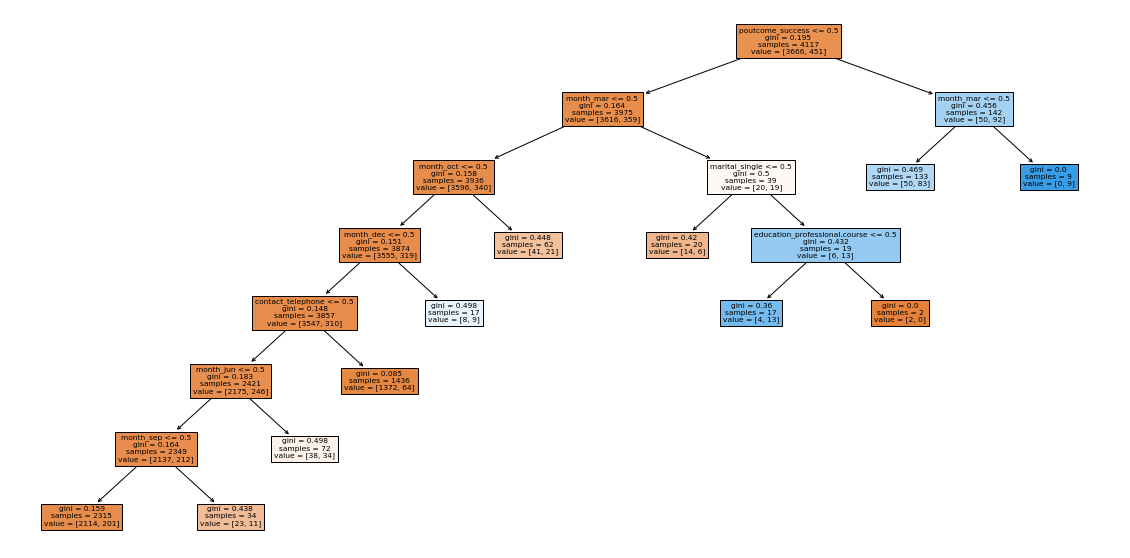

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(tree_model_1,
                   feature_names=X_train.columns.to_list(),
                   filled=True)

In [ ]:
# Test Set
print(metrics.classification_report(y_test,tree_model_1.predict(X_test)))
print(metrics.confusion_matrix(y_test,tree_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1101
           1       0.66      0.21      0.32       135

    accuracy                           0.90      1236
   macro avg       0.79      0.60      0.64      1236
weighted avg       0.88      0.90      0.88      1236

[[1086   15]
 [ 106   29]]


In [ ]:
# Train Set
print(metrics.classification_report(y_train,tree_model_1.predict(X_train)))
print(metrics.confusion_matrix(y_train,tree_model_1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2565
           1       0.64      0.27      0.38       316

    accuracy                           0.90      2881
   macro avg       0.78      0.63      0.66      2881
weighted avg       0.89      0.90      0.89      2881

[[2518   47]
 [ 231   85]]


# Task 3

In code chunk 3 a simple naive bayes model is trained and tested. Using the data that was first imported we create a dataframe for the simple naive bayes model 'cnb'. We then split and encode the data into train and test sets and show the information about the model. The testing and trianing sets are then compared by generating confusion matrices and classification evaluation metrics.

## Code Chunk 3 - Simple Naive Bayes Model Training and Testing

In [ ]:
CD_additional_modified_v2_raw = CD_additional_modified_v2_raw[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]


In [ ]:
# A. Train a Naive Bayes model using the training set from 1.
cnb = CategoricalNB()
CD_v2_tts = CD_additional_modified_v2_enc.copy()
CD_v2_tts_enc = pd.get_dummies(CD_v2_tts)
CD_v2_tts_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_admin.                     4117 non-null   uint8
 1   job_blue-collar                4117 non-null   uint8
 2   job_entrepreneur               4117 non-null   uint8
 3   job_housemaid                  4117 non-null   uint8
 4   job_management                 4117 non-null   uint8
 5   job_retired                    4117 non-null   uint8
 6   job_self-employed              4117 non-null   uint8
 7   job_services                   4117 non-null   uint8
 8   job_student                    4117 non-null   uint8
 9   job_technician                 4117 non-null   uint8
 10  job_unemployed                 4117 non-null   uint8
 11  job_unknown                    4117 non-null   uint8
 12  marital_divorced               4117 non-null   uint8
 13  marital_married   

In [ ]:
# Split encoded data into train and test

X_train, X_test, y_train, y_test = train_test_split(CD_v2_tts_enc,
                                                    y_target, 
                                                    test_size=.3, 
                                                    stratify=y_target)


In [ ]:
# B. Show information about this model
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2881, 51)
(1236, 51)
(2881, 1)
(1236, 1)


In [ ]:
y_train.value_counts()

yes
0      2565
1       316
dtype: int64

In [ ]:
y_train.value_counts()/len(y_train)

yes
0      0.890316
1      0.109684
dtype: float64

In [ ]:
y_test.value_counts()

yes
0      1101
1       135
dtype: int64

In [ ]:
y_test.value_counts()/len(y_test)

yes
0      0.890777
1      0.109223
dtype: float64

In [ ]:
# Fit the model
cnb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# C. Generate and compare this models confusion matrices and
# classification evaluation metrics in testing and training sets
y_pred_train = cnb.predict(X_train)

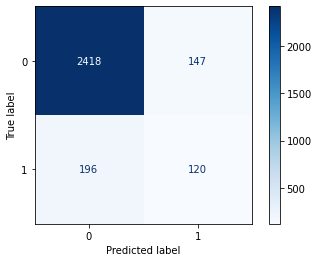

In [ ]:
# Train confusion matrix and evaluation metrics

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_train,y_pred_train),
    display_labels=cnb.classes_
    )
disp.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2565
           1       0.45      0.38      0.41       316

    accuracy                           0.88      2881
   macro avg       0.69      0.66      0.67      2881
weighted avg       0.87      0.88      0.88      2881



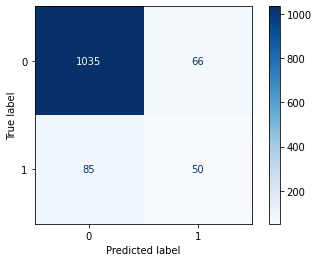

In [ ]:
# Test confusion matrix and evaluation metrics

y_pred_test = cnb.predict(X_test)

# Test cm
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,y_pred_test),
    display_labels=cnb.classes_
    )
disp.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1101
           1       0.43      0.37      0.40       135

    accuracy                           0.88      1236
   macro avg       0.68      0.66      0.67      1236
weighted avg       0.87      0.88      0.87      1236



# Task 4

In code chunk 4, a 5-fold and 10-fold decision tree and naive bayes evaluation performance is done with sklearn's cross_validate() function. The first few blocks of code are for the 5-fold which are then followed by the 10-fold cross validation evaluations. 

## Code Chunk 4 - 5-fold and 10-fold decision tree and NB evaluation performance

In [ ]:
# A. Use the data frame that keeps the entire set of input data to evaluate the decision tree and naive bayes models by 5 and 10 fold cv evaluations

# 5-fold cross validation
scores =cross_validate(
        cnb, CD_additional_modified_v2_enc, y_target, cv=5, scoring=['f1','accuracy','recall','precision'],return_train_score=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
pd.DataFrame(scores)

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.018566,0.006462,0.421687,0.883495,0.388889,0.460526
1,0.014791,0.006877,0.369427,0.879854,0.318681,0.439394
2,0.016921,0.006272,0.402439,0.880923,0.366667,0.445946
3,0.014772,0.007255,0.375839,0.886999,0.311111,0.474576
4,0.014000,0.005904,0.411429,0.874848,0.400000,0.423529


In [1]:
five_fold = pd.DataFrame(scores)

NameError: ignored

In [ ]:
print("mean\n\n",five_fold.mean(axis=0))
print("\n\nstd\n\n",five_fold.std(axis=0))

mean

 fit_time          0.015810
score_time        0.006554
test_f1           0.396164
test_accuracy     0.881224
test_recall       0.357070
test_precision    0.448794
dtype: float64


std

 fit_time          0.001886
score_time        0.000526
test_f1           0.022648
test_accuracy     0.004503
test_recall       0.040415
test_precision    0.019603
dtype: float64


In [ ]:
# 10-fold
scores = cross_validate(
    cnb, CD_additional_modified_v2_enc, y_target, cv=10, scoring=['f1','accuracy','recall','precision'],return_train_score=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
pd.DataFrame(scores)

,fit_time,score_time,test_f1,test_accuracy,test_recall,test_precision
0,0.025110,0.005539,0.527473,0.895631,0.533333,0.521739
1,0.022985,0.004986,0.329114,0.871359,0.288889,0.382353
2,0.013358,0.004836,0.405063,0.885922,0.355556,0.470588
3,0.016639,0.015939,0.297297,0.873786,0.244444,0.379310
4,0.021792,0.006064,0.425000,0.888350,0.377778,0.485714
5,0.019321,0.005619,0.385542,0.876214,0.355556,0.421053
6,0.015187,0.005589,0.250000,0.854369,0.217391,0.294118
7,0.015055,0.005547,0.459459,0.902676,0.377778,0.586207
8,0.024965,0.010617,0.380952,0.873479,0.355556,0.410256
9,0.014904,0.009381,0.439560,0.875912,0.444444,0.434783


In [ ]:
ten_fold = pd.DataFrame(scores)

print("mean\n\n",ten_fold.mean(axis=0))
print("std\n\n",ten_fold.std(axis=0))

mean

 fit_time          0.018932
score_time        0.007412
test_f1           0.389946
test_accuracy     0.879770
test_recall       0.355072
test_precision    0.438612
dtype: float64
std

 fit_time          0.004484
score_time        0.003570
test_f1           0.081400
test_accuracy     0.013770
test_recall       0.092118
test_precision    0.082072
dtype: float64


B. Write a summary comparing splitting into train-test and cross-validation. How are they alike and different?

When splitting into train-test, the N testing set that you generate never has any overlapping testing sets. Each record is used once for training or testing and the number of models you end up with are 1. 

When using cross validation, each record is used once for testing but can be used 'N' times for training. You're essentially building 'N' models and you're testing it, testing the models 'N' times. The number of models you end up with are 'N'.

The major similarities are that they both have N non-overlapping sets for their test sets. They also both only use the testing records once. 

The major differences are that splitting into train-test only uses the train records once where cross validation uses the train records 'N' amount of times. The amount of train sets for train-test are 1 set where cross validation has 'N' amount of train sets. Cross validation has 'N' amount of number of models and splitting train-test has 1 model(s).

#Task 5

In [ ]:
# Render A4_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A4_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A4_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A4_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 475490 bytes to A4_Gardner_Tyler.html
